In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

df_iris = pd.DataFrame(X, columns=feature_names)
df_iris["target"] = y

display(df_iris.head())


Shape de X: (150, 4)
Shape de y: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


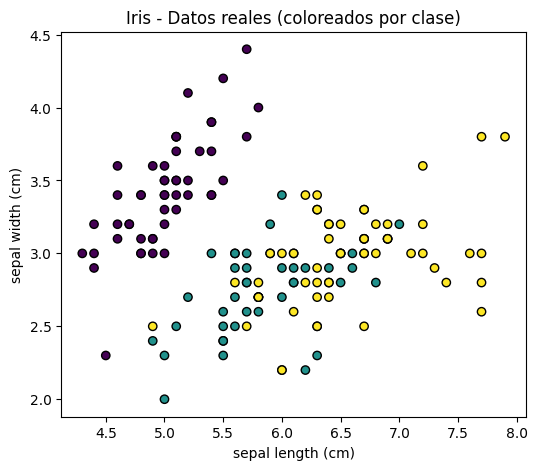

In [2]:
plt.figure(figsize=(6, 5))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolors="k")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Iris - Datos reales (coloreados por clase)")
plt.show()


In [3]:

def initialize_centroids(points, k, random_state=42):
    """
    Selecciona aleatoriamente k puntos del dataset como centroides iniciales.
    """
    np.random.seed(random_state)
    indices = np.random.choice(points.shape[0], size=k, replace=False)
    centroids = points[indices]
    return centroids

def closest_centroid(points, centroids):
    """
    Para cada punto, encuentra el índice del centroide más cercano.
    Regresa un vector de labels de tamaño (n_samples,).
    """
    distances = np.sqrt(((points[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
    closest = np.argmin(distances, axis=1)
    return closest

def move_centroids(points, closest, k):
    """
    Recalcula la posición de los centroides como el promedio de los puntos
    asignados a cada uno.
    """
    new_centroids = np.zeros((k, points.shape[1]))
    for i in range(k):
        cluster_points = points[closest == i]
        if len(cluster_points) > 0:
            new_centroids[i] = cluster_points.mean(axis=0)
        else:
            new_centroids[i] = new_centroids[i]
    return new_centroids


In [4]:
k = 3

centroids = initialize_centroids(X, k=k, random_state=42)
print("Centroides iniciales:\n", centroids)

max_iters = 20

for it in range(max_iters):
    closest = closest_centroid(X, centroids)
    new_centroids = move_centroids(X, closest, k)

    if np.allclose(centroids, new_centroids):
        print(f"Convergencia alcanzada en la iteración {it+1}")
        break

    centroids = new_centroids

print("Centroides finales:\n", centroids)


Centroides iniciales:
 [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]]
Convergencia alcanzada en la iteración 6
Centroides finales:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


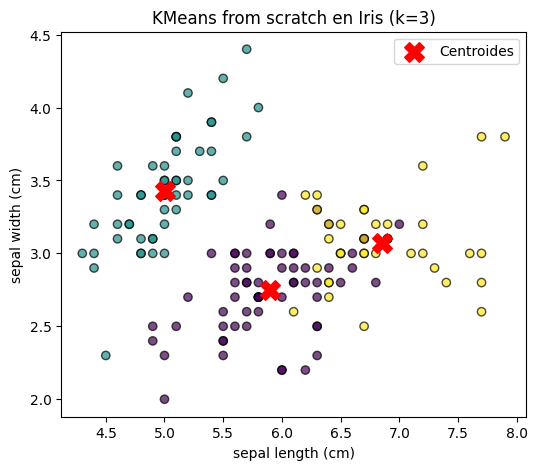

In [5]:
ix1, ix2 = 0, 1

plt.figure(figsize=(6, 5))
plt.scatter(
    X[:, ix1],
    X[:, ix2],
    c=closest,
    cmap="viridis",
    edgecolors="k",
    alpha=0.7
)

plt.scatter(
    centroids[:, ix1],
    centroids[:, ix2],
    c="red",
    marker="X",
    s=200,
    label="Centroides"
)

plt.xlabel(feature_names[ix1])
plt.ylabel(feature_names[ix2])
plt.title("KMeans from scratch en Iris (k=3)")
plt.legend()
plt.show()


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

kmeans_sklearn = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans_sklearn.fit(X)

labels_sklearn = kmeans_sklearn.labels_

ari = adjusted_rand_score(closest, labels_sklearn)
print(f"Adjusted Rand Index (tu KMeans vs sklearn KMeans): {ari:.4f}")

ari_true = adjusted_rand_score(closest, y)
print(f"Adjusted Rand Index (tu KMeans vs clases reales): {ari_true:.4f}")


Adjusted Rand Index (tu KMeans vs sklearn KMeans): 0.9803
Adjusted Rand Index (tu KMeans vs clases reales): 0.7302
